# Import Necessary Libraries

In [3]:
!pip install pydot
!apt-get install graphviz



You should consider upgrading via the 'c:\users\smartcenter\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import io
import seaborn as sns

from sklearn.utils import shuffle  # Shuffle arrays or sparse matrices in a consistent way
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix

import ipywidgets as widgets
from PIL import Image
from IPython.display import display, clear_output


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

# Labels in order of severity

In [1]:
labels = ["0", "1", "2", "3"]

In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm


image_size = 265


X_train = []
Y_train = []

X_test = []
Y_test = []

for i in labels:
    folderPath = os.path.join('D:/Users/smartcenter/Downloads/citrus_leaves/citrus_leaves', 'train', i)
    for j in tqdm(os.listdir(folderPath)):
        image_path = os.path.join(folderPath, j)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (image_size, image_size))
            X_train.append(image)
            Y_train.append(i)
        else:
            print(f"Error al cargar la imagen: {image_path}")

# Cargar las imágenes de prueba
for i in labels:
    folderPath = os.path.join('D:/Users/smartcenter/Downloads/citrus_leaves/citrus_leaves', 'test', i)
    for j in tqdm(os.listdir(folderPath)):
        image_path = os.path.join(folderPath, j)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (image_size, image_size))
            X_test.append(image)
            Y_test.append(i)
        else:
            print(f"Error al cargar la imagen: {image_path}")

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de Y_train: {Y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de Y_test: {Y_test.shape}")


ModuleNotFoundError: No module named 'tqdm'

In [7]:
X_train.shape

(475, 265, 265, 3)

In [8]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

In [9]:
X_train.shape

(475, 265, 265, 3)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

In [11]:
print(Y_train.shape)

(427,)


# Converting String Label to categorical

In [12]:
from tensorflow.keras.utils import to_categorical, plot_model


y_train_new = []
y_test_new = []

for i in Y_train:
    y_train_new.append(labels.index(i))

Y_train = to_categorical(y_train_new)

for i in Y_test:
    y_test_new.append(labels.index(i))

Y_test = to_categorical(y_test_new)

In [13]:
Y_train

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [14]:


import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121

resnet_base = DenseNet121(include_top=False,
                       weights='imagenet',
                       input_shape=(image_size, image_size, 3))


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:

model = resnet_base.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(0.5)(model)
model = tf.keras.layers.Dense(128, activation='relu')(model)
model = tf.keras.layers.Dense(4, activation='softmax')(model)


In [21]:
model = tf.keras.models.Model(inputs=resnet_base.input, outputs=model)

In [22]:
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'])

In [23]:
tensorBoard = TensorBoard(log_dir="logs")
checkPoint = ModelCheckpoint("/content/drive/MyDrive/Citrus/Modelos/densetnet_121.keras",
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.3,
                             patience=2,
                             verbose=1,
                             mode='auto',
                             min_delta=0.001)
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   verbose=1,
                   mode='auto',
                   restore_best_weights=True)

In [24]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=32,
                    validation_split=0.1,
                    epochs=50,
                    verbose=1,
                    callbacks=[tensorBoard, checkPoint, reduce_lr])

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - acc: 0.5790 - loss: 1.1662
Epoch 1: val_loss improved from inf to 27.40015, saving model to /content/drive/MyDrive/Citrus/Modelos/densetnet_121.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - acc: 0.5912 - loss: 1.1327 - val_acc: 0.1860 - val_loss: 27.4002 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - acc: 0.8921 - loss: 0.2678
Epoch 2: val_loss did not improve from 27.40015
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step - acc: 0.8914 - loss: 0.2711 - val_acc: 0.1860 - val_loss: 174.7537 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - acc: 0.9563 - loss: 0.1210
Epoch 3: val_loss did not improve from 27.40015

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step - acc: 0.9552 - loss: 0.1236 - val_acc: 0.1860 - val_loss: 158.2220 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - acc: 0.938

In [25]:
import numpy as np
from sklearn.metrics import (classification_report, accuracy_score, precision_recall_fscore_support,
                             roc_auc_score, confusion_matrix, matthews_corrcoef)
from tensorflow.keras.models import load_model
from sklearn.preprocessing import label_binarize

# Predicciones y métricas
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=1)
actual_label_test = np.argmax(Y_test, axis=1)

classes = [0, 1, 2,3]
y_test_bin = label_binarize(actual_label_test, classes=classes)
roc_auc = roc_auc_score(y_test_bin, label_binarize(pred_test, classes=classes), multi_class='ovr', average='macro')

# Calcular métricas usando 'macro' average
precision_test, recall_test, f1_score_test, _ = precision_recall_fscore_support(actual_label_test, pred_test, average='macro')
accuracy_test = accuracy_score(actual_label_test, pred_test)
matthews_test = matthews_corrcoef(actual_label_test, pred_test)

print("Métricas para el conjunto de prueba:")
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1 Score: {f1_score_test}')
print(f'Accuracy: {accuracy_test}')
print(f'ROC AUC: {roc_auc}')
print(f'Matthews: {matthews_test}')

# Predicciones y métricas
pred_train = model.predict(X_train)
pred_train = np.argmax(pred_train, axis=1)
actual_label_train = np.argmax(Y_train, axis=1)


y_train_bin = label_binarize(actual_label_train, classes=classes)
roc_auc_train = roc_auc_score(y_train_bin, label_binarize(pred_train, classes=classes), multi_class='ovr', average='macro')

precision_train, recall_train, f1_score_train, _ = precision_recall_fscore_support(actual_label_train, pred_train, average='macro')
accuracy_train = accuracy_score(actual_label_train, pred_train)
matthews_train = matthews_corrcoef(actual_label_train, pred_train)

print("\nMétricas para el conjunto de entrenamiento:")
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1 Score: {f1_score_train}')
print(f'Accuracy: {accuracy_train}')
print(f'ROC AUC: {roc_auc_train}')
print(f'Matthews: {matthews_train}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 15s/step
Métricas para el conjunto de prueba:
Precision: 0.917436974789916
Recall: 0.9482062055591467
F1 Score: 0.9296591970121382
Accuracy: 0.9375
ROC AUC: 0.9635534650359129
Matthews: 0.9129219193175132
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 403ms/step

Métricas para el conjunto de entrenamiento:
Precision: 0.9911699465362303
Recall: 0.9863558530510586
F1 Score: 0.9886874679737471
Accuracy: 0.9882903981264637
ROC AUC: 0.9909914009711458
Matthews: 0.983734989372762


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


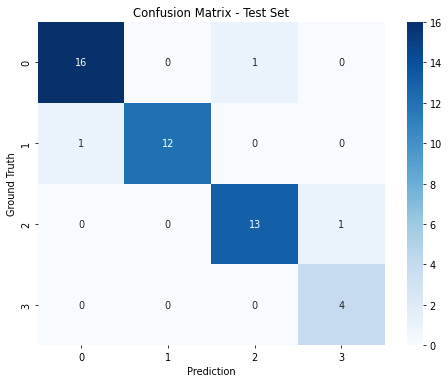

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


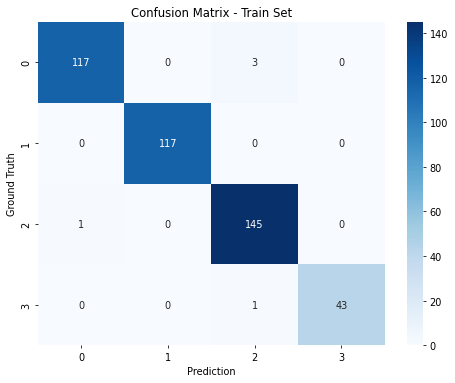

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=1)
actual_label_test = np.argmax(Y_test, axis=1)

#  matriz de confusión
cnf_test = confusion_matrix(actual_label_test, pred_test)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf_test, cmap='Blues', annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show()

# Predicciones
pred_train = model.predict(X_train)
pred_train = np.argmax(pred_train, axis=1)
actual_label_train = np.argmax(Y_train, axis=1)

#matriz de confusión
cnf_train = confusion_matrix(actual_label_train, pred_train)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf_train, cmap='Blues', annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show()


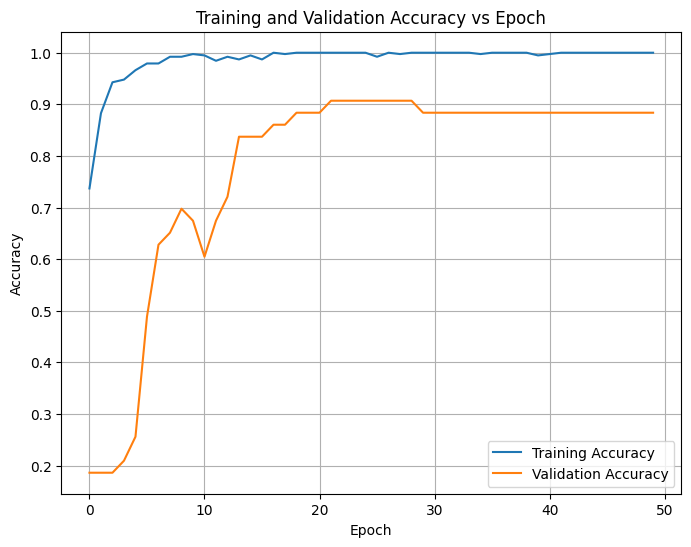

In [27]:
import matplotlib.pyplot as plt




train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(8,6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [28]:

scores = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

2/2 - 5s - 2s/step - acc: 0.9375 - loss: 0.1086
Test Loss: 0.10857343673706055
Test Accuracy: 0.9375
